https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html

- 아래 코드는 pytorch 한국 사용자 모임에 올려진 공식 tutorial 코드입니다 
- 약간의 수정을 하여 cpu 및 cuda 환경에서 모두 작동할수 있도록 수정했습니다

# Cifar10 데이터셋
![](https://paperswithcode.com/media/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg)

- **3 x 32 x 32** :  32x32 픽셀 크기의 이미지가 3개 채널(channel)
- 10개 클래스

# 우선 처음부터 끝까지 코드를 하나하나 보면서 실행해보세요

In [1]:
# 실행환경에 따라 변경하세요
save_dir = r'D:\DevRoot\DataSet\torch\dataset'   # 학습 환경
# save_dir = r'./dataset'    # Colab 사용시


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import os

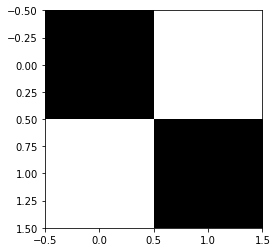

In [3]:
# 이상하게 torch 를 import 하기 전에 
# 먼저  imshow() 해줘야 나중에 정상적으로 시각화 된다.
d = np.array([[0, 1], [1, 0]])
plt.imshow(d, 'gray')
plt.show()

In [4]:
import torch

# 모델 설계를 위한 nn, F
import torch.nn as nn
import torch.nn.functional as F

# Optimization 을 
import torch.optim as optim

# torchvision 은 주로 이미지 데이터를 관리하기 위한 모듈
# torchvision 데이터셋의 출력(output)은 [0, 1] 범위를 갖는 PILImage 이미지입니다. 
# 이를 [-1, 1]의 범위로 정규화된 Tensor로 변환합니다.
import torchvision
from torchvision import datasets, transforms



# Hyper Parameter

In [5]:
seed = 1   # PyTorch 는 랜덤하게 학습을 하다 보니까, 학습 랜덤값을 고정시키기 위해 seed 사용

lr = 0.001   # learning rate
momentum = 0.5  # SGD 의 lr 에 같이 넣어주는 param. 

batch_size = 4

epochs = 3

no_cuda = False    # CUDA 설치되어 있으면 False 로 하세요
log_interval = 2000

## CPU vs Cuda 사용여부 세팅

In [6]:
use_cuda = not no_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}

cpu


# Preprocess

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root=save_dir, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, **kwargs)

testset = torchvision.datasets.CIFAR10(root=save_dir, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, **kwargs)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# 문제 1
`transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])`    <-- 왜 (0.5, 0.5, 0.5 ) 3개씩인가?  설명해보세요

>
>
>

In [8]:
# 답안 작성






## 데이터 확인

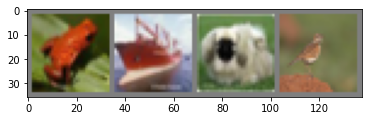

 frog  ship   dog  bird


In [9]:
# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

# 문제2-1
`img = img / 2 + 0.5`    <-- 왜 이것이 unnormalizing 인가?



In [10]:
# 답안작성 2-1] 




# 문제2-2
`plt.imshow(np.transpose(npimg, (1, 2, 0)))`   <- transpose 를 한 이유는 무엇인가?


In [11]:






# 답안작성 2-2]






 # Model

In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 문제 3

- 14번째 행   `x = x.view(-1, 16 * 5 * 5)`  ←  왜 두번째 매개변수는 16 * 5 * 5 이 되었는가? 

최초 데이터 입력부터 view() 에 이르기까지 각 레이어를 통과할때 마다 shape 의 구체적인 변화와 이유를 통해 설명해보세요


In [13]:
# 답안 작성]







# Model compilie & Optimizer

In [14]:
net = Net().to(device)  # 컴파일
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

In [15]:
for epoch in range(epochs):   # 데이터셋을 수차례 반복합니다.

    net.train()

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels =  data[0].to(device), data[1].to(device)

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.287
[1,  6000] loss: 2.180
[1,  8000] loss: 2.016
[1, 10000] loss: 1.919
[1, 12000] loss: 1.841
[2,  2000] loss: 1.752
[2,  4000] loss: 1.679
[2,  6000] loss: 1.622
[2,  8000] loss: 1.590
[2, 10000] loss: 1.563
[2, 12000] loss: 1.535
[3,  2000] loss: 1.469
[3,  4000] loss: 1.448
[3,  6000] loss: 1.430
[3,  8000] loss: 1.417
[3, 10000] loss: 1.410
[3, 12000] loss: 1.410
Finished Training


## 학습모델 저장

In [16]:
PATH = os.path.join(save_dir, 'cifar_net.pth')
torch.save(net.state_dict(), PATH)

## 테스트

### 테스트용 데이터 들여다 보기

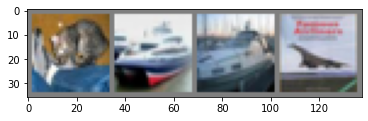

GroundTruth:    cat  ship  ship plane


In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()


# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))  # 4개만

## 저장했던 모델 불러오기

In [18]:
net = Net().to(device)  # 컴파일
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

## 예측해보기

In [19]:
outputs = net(images.to(device))  # 앞선 4개에 대해 들여다 보기

In [20]:
outputs

tensor([[-0.9843, -2.9012,  1.6284,  3.7837, -0.0310,  3.3738,  1.2802, -0.4482,
         -1.8850, -1.9363],
        [ 3.3360,  3.4333, -0.8789, -2.5758, -1.8475, -3.9805, -3.8649, -3.4466,
          5.6392,  3.3429],
        [ 1.6597,  2.1388, -0.5467, -1.1356, -1.3448, -1.6131, -3.0067, -1.6180,
          2.6835,  2.3040],
        [ 3.0548,  1.3955,  0.1432, -1.4433, -0.3351, -2.8271, -1.9093, -2.4827,
          3.7521,  0.8625]], grad_fn=<AddmmBackward>)

In [21]:
outputs.shape

torch.Size([4, 10])

# 문제 4
 - 
 위 outputs 의 shape 은 왜 [4, 10] 이 되었는지 설명해보세요

In [22]:
# 답안작성]








# 전체 데이터 셋에 대해 정확도 확인

In [23]:
net.eval()

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels =  data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %


## 각 클래스별로 정확도 확인

In [24]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 54 %
Accuracy of  bird : 37 %
Accuracy of   cat : 26 %
Accuracy of  deer : 25 %
Accuracy of   dog : 63 %
Accuracy of  frog : 46 %
Accuracy of horse : 69 %
Accuracy of  ship : 51 %
Accuracy of truck : 60 %
